In [48]:
using Pkg
include("./TSClustering.jl")
cd("/cluster/home/danare/git/Clustering")
Pkg.activate(".")
using .TSClustering

  Activating project at `~/git/Clustering`


In [2]:
# config
path = "/cluster/home/danare/git/GENeSYS_MOD.data/Output/output_excel/Timeseries.xlsx";
k=6
config = "/cluster/home/danare/git/Clustering/data/config.yml"
country = "DE"

"DE"

In [4]:
config = TSClustering.read_yaml_file(file=config);

In [5]:
# read in data
data_org = TSClustering.read_data(path=path, config=config);
data_clustering_org = TSClustering.create_clustering_matrix(config=config, CountryData=data_org);
# apply normalization
data = TSClustering.normalize_data(CountryData=data_org, config=config);
data_clustering = TSClustering.create_clustering_matrix(config=config, CountryData=data);

In [6]:
# cluster k-means
cluster_results = TSClustering.cluster_kmeans(k=k, x=data_clustering);
cluster_dict = TSClustering.convert_data(k=k, config=config, M=cluster_results.M);

In [15]:
weights = Dict{Int64, Int64}()
for (i,k) in enumerate(cluster_results.c)
    weights[i] = k
end

### 1. K-MEANS

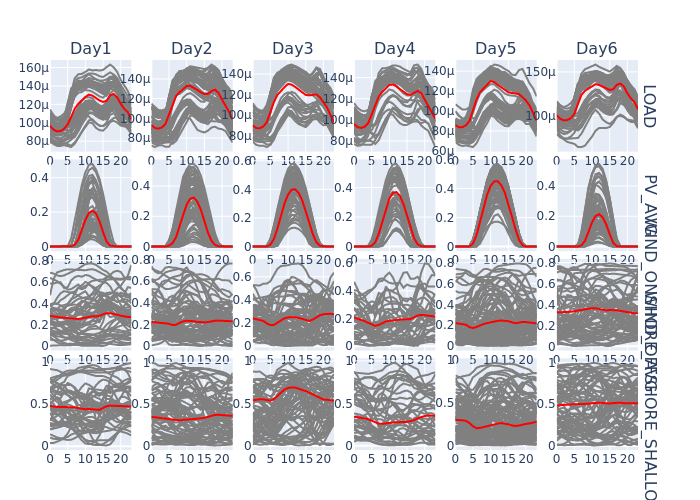

In [61]:
# plot the results
TSClustering.plot_cluster_centers(K=k, config=config, FullData=cluster_dict, CountryData=data, country=country, a=cluster_results.a)

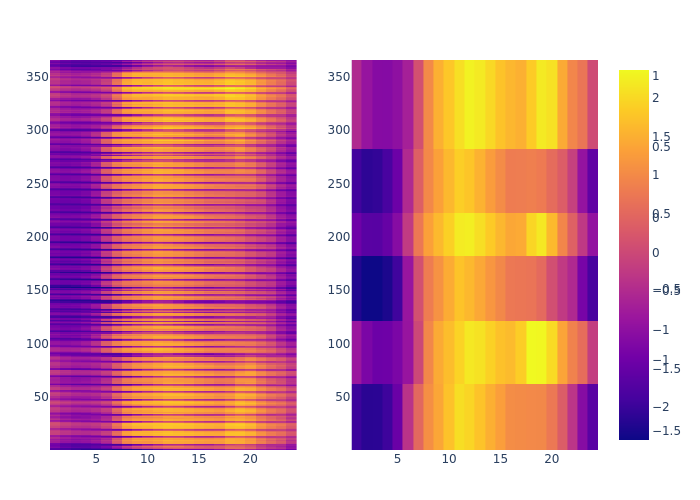

In [49]:
country = "DE"
technology = "TS_LOAD"
clustered_data = TSClustering.upsample_time_series(weight=weights, cluster_dict=cluster_dict, region=country, technology=technology);
TSClustering.plot_heatmaps(full_data=data_org[technology][:,country], clustered_data=clustered_data[country, technology,:])

In [ ]:
data_org[technology][:,country]